<a href="https://colab.research.google.com/github/vnscience/DataMining/blob/main/KPDLDiemTHPTQG22_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bức tranh Giáo dục Việt Nam qua Dữ liệu điểm thi THPT Quốc gia (2022-2024)

**Mục tiêu:**

* Khám phá xu hướng và đặc điểm về kết quả học tập của học sinh trên cả nước.

* Xác định các "cụm" tỉnh thành có đặc điểm giáo dục tương đồng.

* Tìm ra các quy luật tiềm ẩn trong việc lựa chọn môn thi và tổ hợp xét tuyển.

* Xây dựng mô hình dự báo đơn giản.

* Trực quan hóa kết quả trên bản đồ địa lý Việt Nam để có cái nhìn trực quan, sinh động.

**Công cụ chính**: Python, Pandas, Scikit-learn, Matplotlib, Seaborn, và đặc biệt là GeoPandas cho bản đồ.

## 1. Tiền xử lý và Khám phá Dữ liệu (Data Preprocessing & EDA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# Download link: https://drive.google.com/drive/folders/1H8yX2zq2cNYLGjcuoH1iO2QfBxmvj0A6?usp=sharing
df_2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/DiemTHPTQG 2022-2024/diem_thi_thpt_2022.csv")
df_2023 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/DiemTHPTQG 2022-2024/diem_thi_thpt_2023.csv")
df_2024 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/DiemTHPTQG 2022-2024/diem_thi_thpt_2024.csv")

### 1.1 Hợp nhất dữ liệu

In [3]:
# Xoá trùng toàn bộ dòng
df_2022.drop_duplicates(inplace=True)
df_2023.drop_duplicates(inplace=True)
df_2024.drop_duplicates(inplace=True)

# Xoá trùng theo SBD (giữ lại dòng đầu tiên)
df_2022.drop_duplicates(subset='sbd', keep='first', inplace=True) # inplace: có thay đổi trực tiếp trên dataframe không hay tạo bản sao
df_2023.drop_duplicates(subset='sbd', keep='first', inplace=True)
df_2024.drop_duplicates(subset='sbd', keep='first', inplace=True)

# Xoá cột ma_ngoai_ngu của df_2023, df_2024
df_2023.drop(columns='ma_ngoai_ngu', inplace=True, errors='ignore') # Nếu không có cột này thì vẫn không gây lỗi, thích hợp cho quy trình tự động
df_2024.drop(columns='ma_ngoai_ngu', inplace=True, errors='ignore')

In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995441 entries, 0 to 995440
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sbd        995441 non-null  int64  
 1   toan       982726 non-null  float64
 2   ngu_van    981407 non-null  float64
 3   ngoai_ngu  870609 non-null  float64
 4   vat_li     325523 non-null  float64
 5   hoa_hoc    327367 non-null  float64
 6   sinh_hoc   322198 non-null  float64
 7   lich_su    659662 non-null  float64
 8   dia_li     657421 non-null  float64
 9   gdcd       554343 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 75.9 MB


In [5]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022060 entries, 0 to 1022059
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sbd        1022060 non-null  int64  
 1   toan       1003373 non-null  float64
 2   ngu_van    1008239 non-null  float64
 3   ngoai_ngu  880997 non-null   float64
 4   vat_li     327189 non-null   float64
 5   hoa_hoc    328118 non-null   float64
 6   sinh_hoc   324625 non-null   float64
 7   lich_su    683447 non-null   float64
 8   dia_li     682134 non-null   float64
 9   gdcd       565452 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.0 MB


In [6]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061605 entries, 0 to 1061604
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sbd        1061605 non-null  int64  
 1   toan       1045613 non-null  float64
 2   ngu_van    1050101 non-null  float64
 3   ngoai_ngu  912705 non-null   float64
 4   vat_li     345615 non-null   float64
 5   hoa_hoc    346518 non-null   float64
 6   sinh_hoc   342378 non-null   float64
 7   lich_su    706214 non-null   float64
 8   dia_li     704682 non-null   float64
 9   gdcd       583609 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 81.0 MB


In [ ]:
# df_2022['toan'] = pd.to_numeric(df_2022['toan'], errors='coerce')  # chuyển về số, lỗi thì NaN

In [7]:
# Thêm cột năm thi chuẩn bị hợp nhất
df_2022['NamThi'] = 2022
df_2023['NamThi'] = 2023
df_2024['NamThi'] = 2024

In [8]:
# Gộp dữ liệu
df_total = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

In [9]:
df_total.rename(columns={
    'sbd'       : 'ID',
    'toan'      : 'Toan',
    'ngu_van'   : 'Van',
    'vat_li'    : 'Ly',
    'hoa_hoc'   : 'Hoa',
    'sinh_hoc'  : 'Sinh',
    'lich_su'   : 'Su',
    'dia_li'    : 'Dia',
    'gdcd'      : 'GDCD',
    'ngoai_ngu'  : 'NN'
}, inplace=True)

In [10]:
df_total.head()

,ID,Toan,Van,NN,Ly,Hoa,Sinh,Su,Dia,GDCD,NamThi
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,2022
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,2022
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,2022
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,2022
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,2022


## 1.2	Xử lý dữ liệu khuyết thiếu (Missing Values)

In [11]:
# Lấy danh sách các cột điểm
score_cols = ['Toan', 'Van', 'NN', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD']

# Xử lý dữ liệu khuyết thiếu
df_total[score_cols] = df_total[score_cols].fillna(0)

## 1.3 Tạo thuộc tính mới (Feature Engineering)

In [12]:
# Feature Engineering
# Chuyển SBD sang kiểu string để xử lý
df_total['ID'] = df_total['ID'].astype(str).str.zfill(8)
df_total['MaTinh'] = df_total['ID'].str[:2]
ma_tinh_dict = {
    '01': 'Hà Nội', '02': 'TP. Hồ Chí Minh', '03': 'Hải Phòng', '04': 'Đà Nẵng', '05': 'Hà Giang',
    '06': 'Cao Bằng', '07': 'Lai Châu', '08': 'Lào Cai', '09': 'Tuyên Quang', '10': 'Lạng Sơn',
    '11': 'Bắc Kạn', '12': 'Thái Nguyên', '13': 'Yên Bái', '14': 'Sơn La', '15': 'Phú Thọ',
    '16': 'Vĩnh Phúc', '17': 'Quảng Ninh', '18': 'Bắc Giang', '19': 'Bắc Ninh', '21': 'Hải Dương',
    '22': 'Hưng Yên', '23': 'Hòa Bình', '24': 'Hà Nam', '25': 'Nam Định', '26': 'Thái Bình',
    '27': 'Ninh Bình', '28': 'Thanh Hóa', '29': 'Nghệ An', '30': 'Hà Tĩnh', '31': 'Quảng Bình',
    '32': 'Quảng Trị', '33': 'Thừa Thiên Huế', '34': 'Quảng Nam', '35': 'Quảng Ngãi', '36': 'Kon Tum',
    '37': 'Bình Định', '38': 'Gia Lai', '39': 'Phú Yên', '40': 'Đăk Lăk', '41': 'Khánh Hòa',
    '42': 'Lâm Đồng', '43': 'Bình Phước', '44': 'Bình Dương', '45': 'Ninh Thuận', '46': 'Tây Ninh',
    '47': 'Bình Thuận', '48': 'Đồng Nai', '49': 'Long An', '50': 'Đồng Tháp', '51': 'An Giang',
    '52': 'Bà Rịa - Vũng Tàu', '53': 'Tiền Giang', '54': 'Kiên Giang', '55': 'Cần Thơ',
    '56': 'Bến Tre', '57': 'Vĩnh Long', '58': 'Trà Vinh', '59': 'Sóc Trăng', '60': 'Bạc Liêu',
    '61': 'Cà Mau', '62': 'Điện Biên', '63': 'Đăk Nông', '64': 'Hậu Giang',
}

df_total['TenTinh'] = df_total['MaTinh'].map(ma_tinh_dict)

# Tính điểm khối
df_total['KhoiA'] = df_total['Toan'] + df_total['Ly'] + df_total['Hoa']
df_total['KhoiA1'] = df_total['Toan'] + df_total['Ly'] + df_total['NN']
df_total['KhoiB'] = df_total['Toan'] + df_total['Hoa'] + df_total['Sinh']
df_total['KhoiC'] = df_total['Van'] + df_total['Su'] + df_total['Dia']
df_total['KhoiD'] = df_total['Toan'] + df_total['Van'] + df_total['NN']

df_total.head()

,ID,Toan,Van,NN,Ly,Hoa,Sinh,Su,Dia,GDCD,NamThi,MaTinh,TenTinh,KhoiA,KhoiA1,KhoiB,KhoiC,KhoiD
0,01000001,3.6,5.00,4.0,0.0,0.0,0.0,2.75,6.0,8.75,2022,01,Hà Nội,3.6,7.6,3.6,13.75,12.60
1,01000002,8.4,6.75,7.6,0.0,0.0,0.0,8.50,7.5,8.25,2022,01,Hà Nội,8.4,16.0,8.4,22.75,22.75
2,01000003,5.8,7.50,5.0,0.0,0.0,0.0,7.25,5.5,8.75,2022,01,Hà Nội,5.8,10.8,5.8,20.25,18.30
3,01000004,7.4,7.50,8.6,0.0,0.0,0.0,7.50,6.5,7.50,2022,01,Hà Nội,7.4,16.0,7.4,21.50,23.50
4,01000005,7.2,8.50,9.0,0.0,0.0,0.0,8.00,8.5,8.25,2022,01,Hà Nội,7.2,16.2,7.2,25.00,24.70


In [13]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079106 entries, 0 to 3079105
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   ID       object 
 1   Toan     float64
 2   Van      float64
 3   NN       float64
 4   Ly       float64
 5   Hoa      float64
 6   Sinh     float64
 7   Su       float64
 8   Dia      float64
 9   GDCD     float64
 10  NamThi   int64  
 11  MaTinh   object 
 12  TenTinh  object 
 13  KhoiA    float64
 14  KhoiA1   float64
 15  KhoiB    float64
 16  KhoiC    float64
 17  KhoiD    float64
dtypes: float64(14), int64(1), object(3)
memory usage: 422.9+ MB


In [14]:
df_2024_export = df_total[df_total['NamThi'] == 2024].copy()
df_2024_export.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/df_2024_export.csv')

## 2. Phân tích Mô tả và Trực quan hóa trên Bản đồ

### 2.1 Phân tích thống kê cơ bản

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- 1.1 Thống kê mô tả và Boxplot so sánh các năm ---
print("--- Thống kê mô tả điểm các môn theo năm ---")
# Sử dụng groupby để tính toán cho từng năm
stats_by_year = df_total.groupby('NamThi')[score_cols].agg(['mean', 'median', 'std'])
# In kết quả cho dễ đọc
for year in [2022, 2023, 2024]:
    print(f"\nNăm {year}:")
    print(stats_by_year.loc[year].round(2))

--- Thống kê mô tả điểm các môn theo năm ---

Năm 2022:
Toan  mean      6.38
      median    6.80
      std       1.82
Van   mean      6.42
      median    6.50
      std       1.57
NN    mean      4.51
      median    4.40
      std       2.50
Ly    mean      2.20
      median    0.00
      std       3.26
Hoa   mean      2.20
      median    0.00
      std       3.28
Sinh  mean      1.62
      median    0.00
      std       2.49
Su    mean      4.20
      median    5.25
      std       3.27
Dia   mean      4.41
      median    5.75
      std       3.31
GDCD  mean      4.47
      median    6.75
      std       4.07
Name: 2022, dtype: float64

Năm 2023:
Toan  mean      6.14
      median    6.60
      std       1.82
Van   mean      6.77
      median    7.00
      std       1.54
NN    mean      4.71
      median    4.80
      std       2.62
Ly    mean      2.10
      median    0.00
      std       3.18
Hoa   mean      2.17
      median    0.00
      std       3.25
Sinh  mean      2.03
   

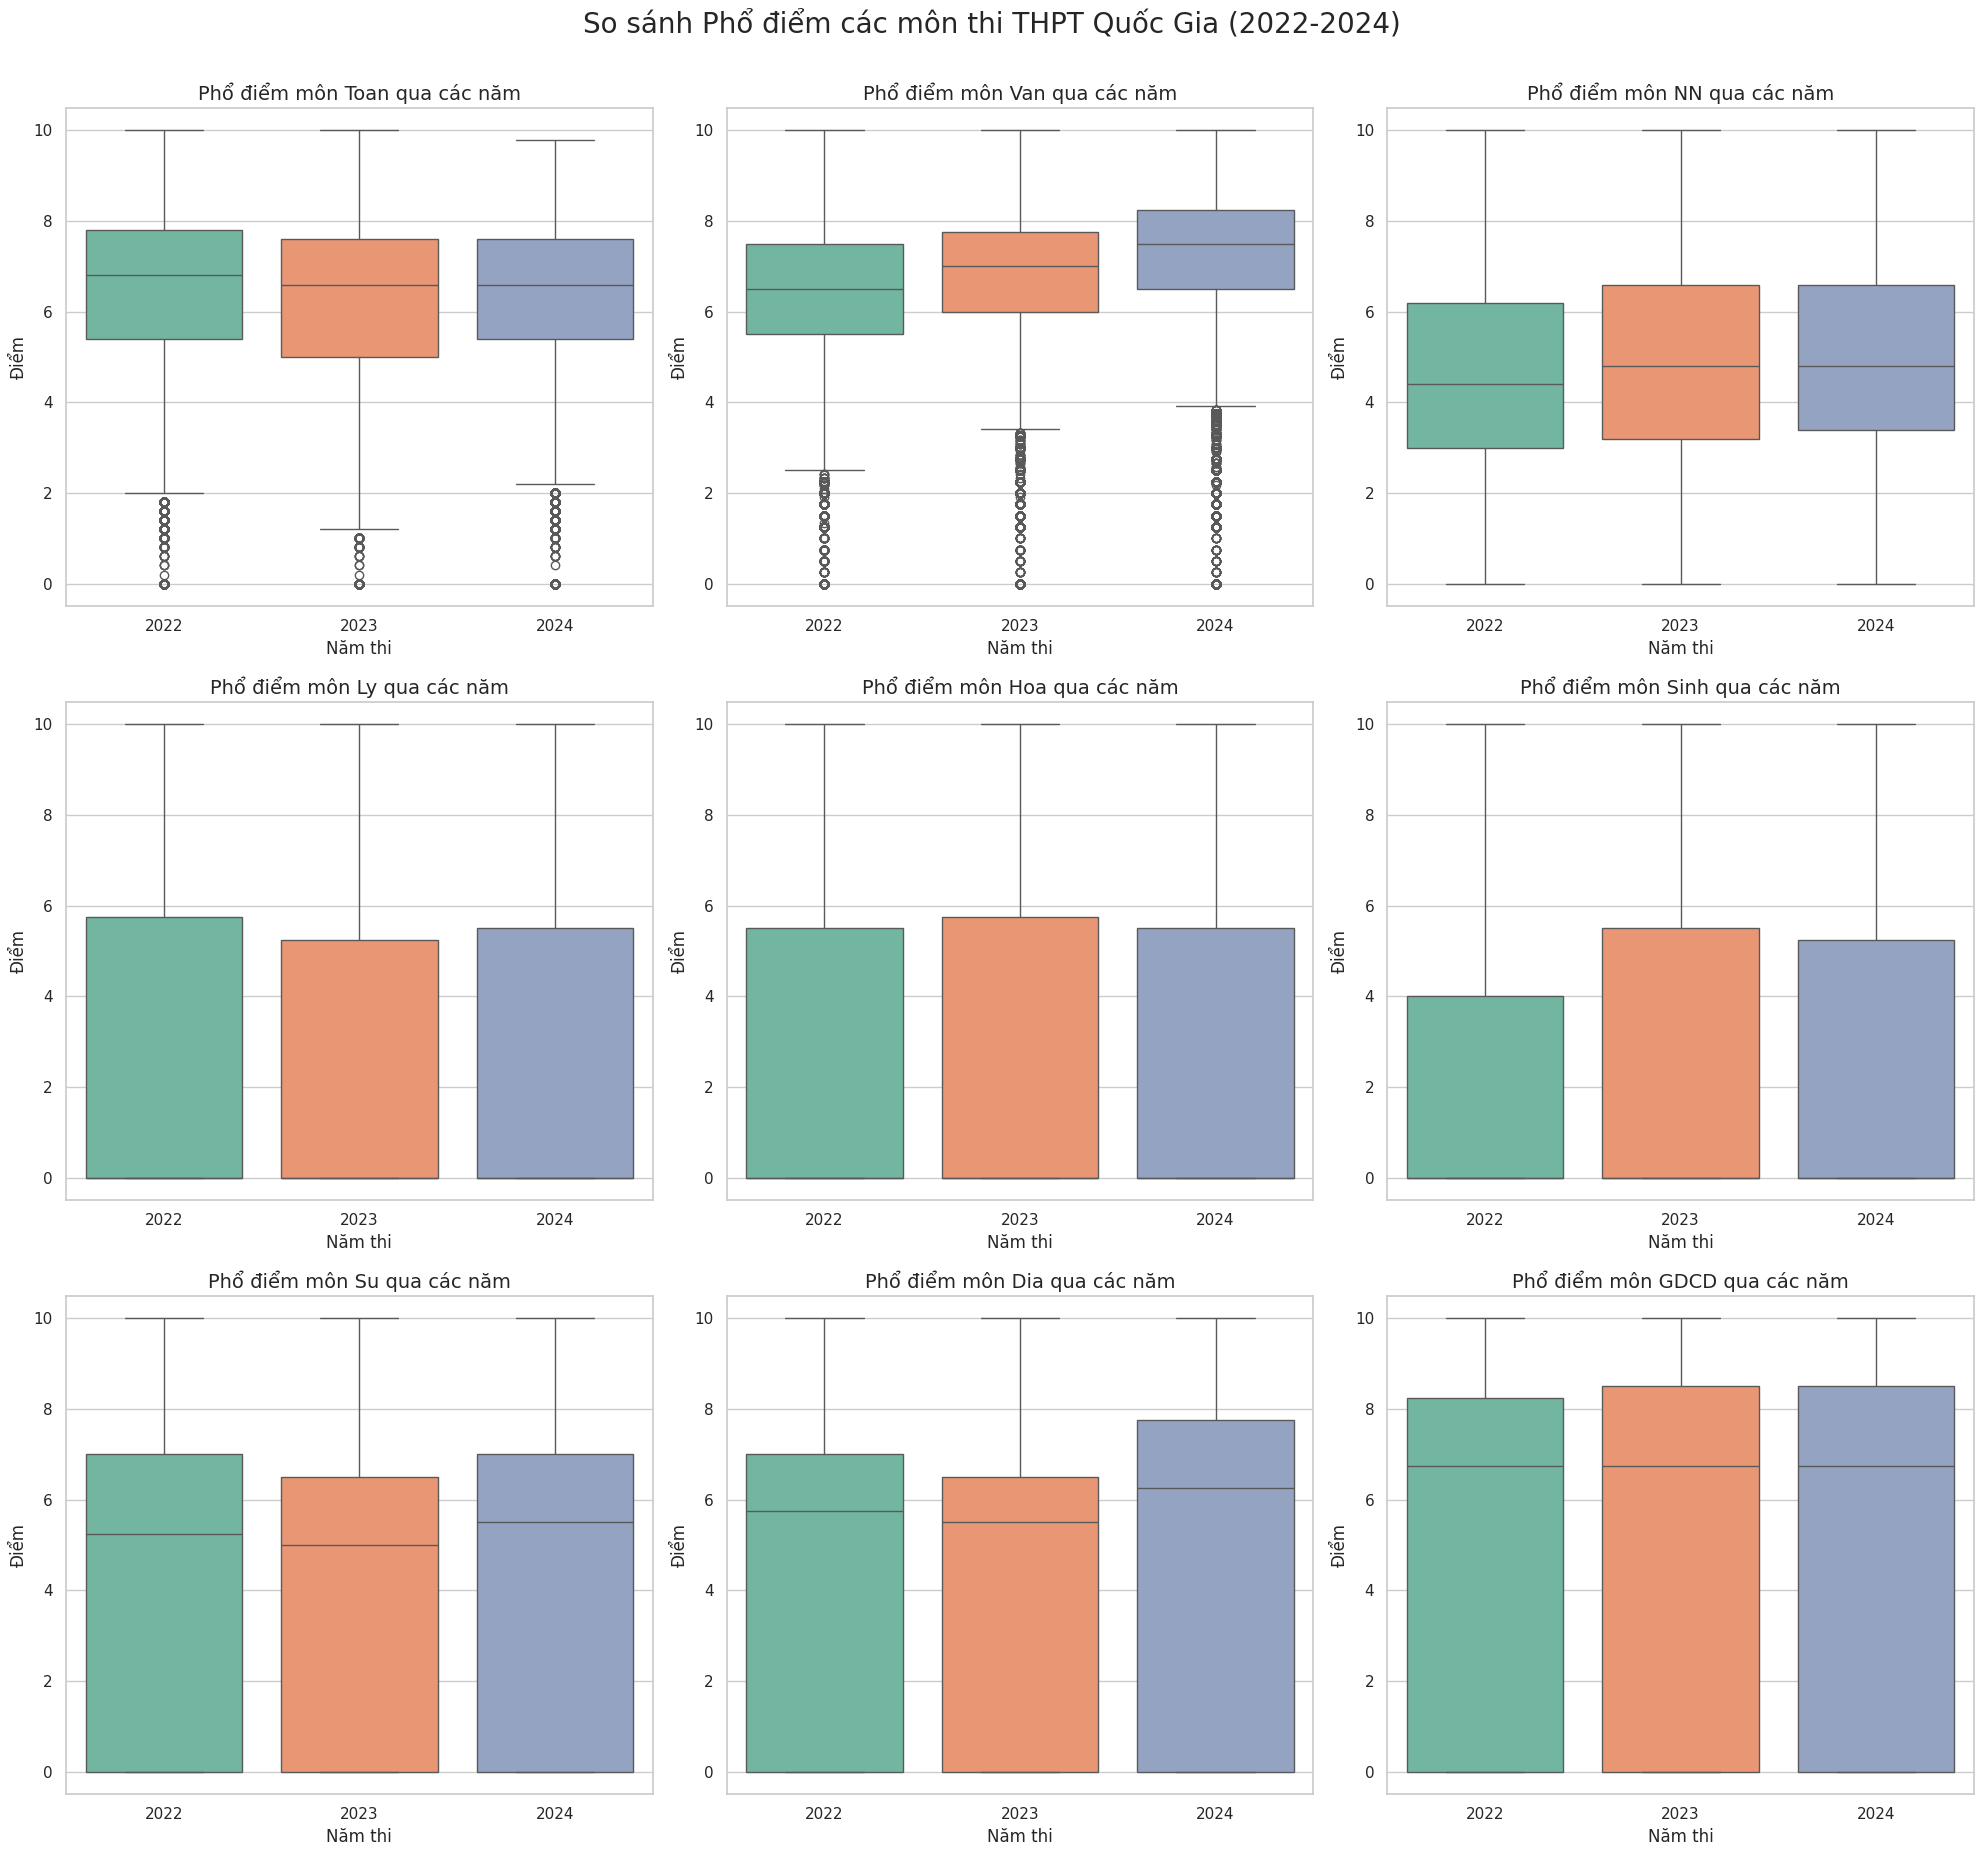

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style
sns.set_theme(style='whitegrid')

# Tạo subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# Vẽ boxplot
for i, subject in enumerate(score_cols):
    sns.boxplot(
        x='NamThi',
        y=subject,
        hue='NamThi',  # thêm hue để tránh warning
        data=df_total,
        ax=axes[i],
        palette='Set2',
        dodge=False,       # Không tách boxplot nếu hue trùng với x
        legend=False       # Không cần chú thích màu vì đã ở trục x
    )
    axes[i].set_title(f'Phổ điểm môn {subject} qua các năm', fontsize=14)
    axes[i].set_xlabel('Năm thi', fontsize=12)
    axes[i].set_ylabel('Điểm', fontsize=12)

plt.tight_layout()
plt.suptitle('So sánh Phổ điểm các môn thi THPT Quốc Gia (2022-2024)', fontsize=20, y=1.03)
plt.show()



--- So sánh phổ điểm môn Tiếng Anh 2022 vs 2024 ---


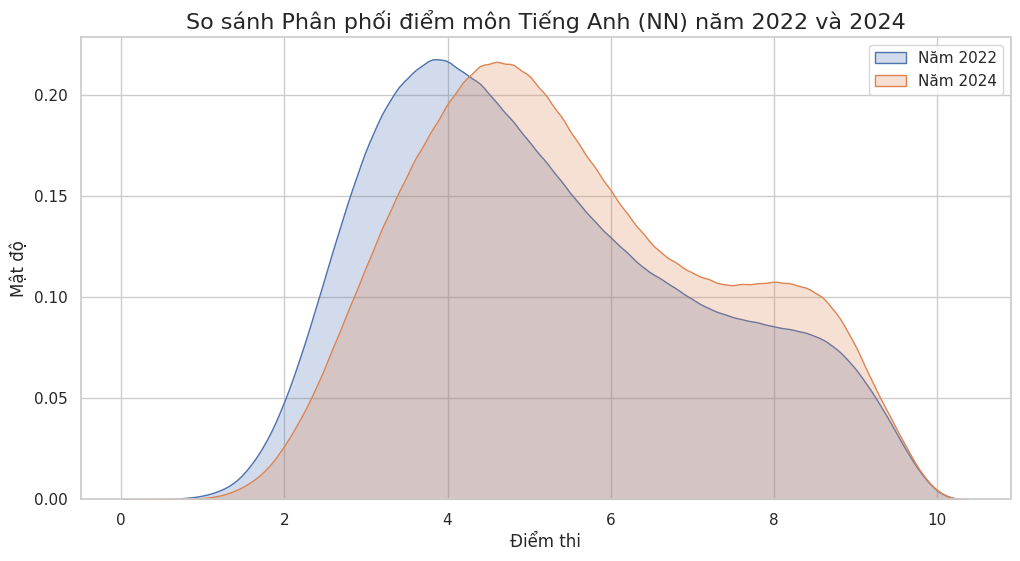


--- Thống kê số lượng điểm liệt (<= 1 điểm) theo môn ---
NN      727
Toan    343
Van     263
Su      125
Sinh     87
Ly       70
Dia      67
Hoa      48
GDCD      8
dtype: int64


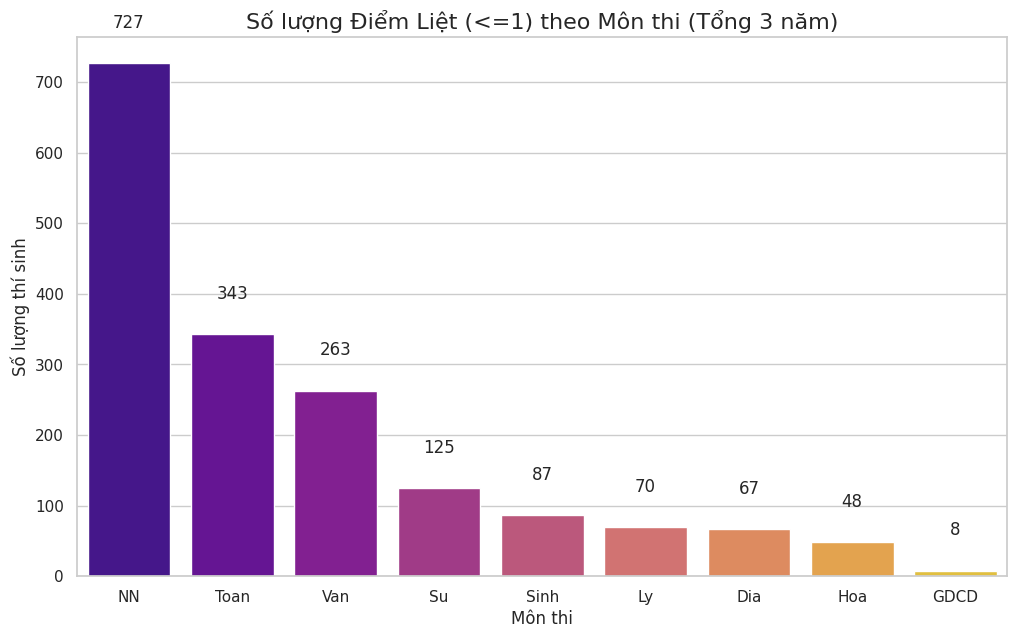

In [18]:
# --- 1.2 Trả lời câu hỏi thực tế ---

# Câu hỏi 1: Phổ điểm môn Tiếng Anh (NN) năm 2024 thay đổi thế nào so với 2022?
print("\n--- So sánh phổ điểm môn Tiếng Anh 2022 vs 2024 ---")
plt.figure(figsize=(12, 6))
# Vẽ biểu đồ mật độ (KDE) để so sánh phân phối
sns.kdeplot(df_total[(df_total['NamThi'] == 2022) & (df_total['NN'] > 0)]['NN'], label='Năm 2022', fill=True)
sns.kdeplot(df_total[(df_total['NamThi'] == 2024) & (df_total['NN'] > 0)]['NN'], label='Năm 2024', fill=True)
plt.title('So sánh Phân phối điểm môn Tiếng Anh (NN) năm 2022 và 2024', fontsize=16)
plt.xlabel('Điểm thi', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Câu hỏi 2: Môn nào có nhiều điểm liệt (<= 1) nhất?
# Chỉ tính điểm liệt cho các bài thi có điểm > 0 (tức là thí sinh có đi thi)
df_thi = df_total[df_total[score_cols].sum(axis=1) > 0] # Lọc các thí sinh có đi thi

diem_liet_counts = {}
for subject in score_cols:
    # Đếm số lượng điểm <= 1 nhưng > 0
    count = df_thi[(df_thi[subject] <= 1) & (df_thi[subject] > 0)].shape[0]
    diem_liet_counts[subject] = count

# Chuyển thành Series để dễ sắp xếp và vẽ
diem_liet_series = pd.Series(diem_liet_counts).sort_values(ascending=False)

print("\n--- Thống kê số lượng điểm liệt (<= 1 điểm) theo môn ---")
print(diem_liet_series)

# Trực quan hóa
plt.figure(figsize=(12, 7))
sns.barplot(x=diem_liet_series.index, y=diem_liet_series.values, hue=diem_liet_series.index, palette='plasma')
plt.title('Số lượng Điểm Liệt (<=1) theo Môn thi (Tổng 3 năm)', fontsize=16)
plt.xlabel('Môn thi', fontsize=12)
plt.ylabel('Số lượng thí sinh', fontsize=12)
for index, value in enumerate(diem_liet_series.values):
    plt.text(index, value + 50, str(value), ha='center') # Thêm số liệu trên cột
plt.show()

### 2.2 Phân tích theo tỉnh thành (năm 2024)

In [19]:
# --- 2.1 Tính điểm trung bình theo tỉnh ---
# Chỉ tính cho năm gần nhất là 2024 để phân tích
df_2024 = df_total[df_total['NamThi'] == 2024].copy()

# Các cột cần tính trung bình
avg_cols = score_cols + ['KhoiA', 'KhoiB', 'KhoiC', 'KhoiD']

# Sử dụng groupby và agg để tính trung bình cho nhiều cột cùng lúc
province_avg_scores = df_2024.groupby(['MaTinh', 'TenTinh'])[avg_cols].mean().round(2)

print("\n--- Điểm trung bình các môn và khối thi theo tỉnh (Năm 2024) ---")
print(province_avg_scores.head())


--- Điểm trung bình các môn và khối thi theo tỉnh (Năm 2024) ---
                        Toan   Van    NN    Ly   Hoa  Sinh    Su   Dia  GDCD  \
MaTinh TenTinh                                                                 
01     Hà Nội           6.67  7.67  5.13  1.85  1.69  1.59  4.72  5.03  4.73   
02     TP. Hồ Chí Minh  6.92  6.53  5.65  3.57  3.68  3.50  2.79  3.02  2.79   
03     Hải Phòng        6.76  7.94  5.21  2.22  2.11  2.01  4.61  5.10  4.91   
04     Đà Nẵng          6.53  6.45  5.18  2.91  2.81  2.45  3.31  3.67  3.49   
05     Hà Giang         4.40  6.02  3.41  0.42  0.44  0.41  5.32  5.93  5.91   

                        KhoiA  KhoiB  KhoiC  KhoiD  
MaTinh TenTinh                                      
01     Hà Nội           10.21   9.95  17.42  19.47  
02     TP. Hồ Chí Minh  14.17  14.09  12.34  19.10  
03     Hải Phòng        11.09  10.88  17.66  19.92  
04     Đà Nẵng          12.24  11.79  13.43  18.15  
05     Hà Giang          5.26   5.25  17.27  13.83  


In [20]:
# --- 2.2 Xếp hạng các tỉnh (hiển thị Tên Tỉnh) ---
print("\n--- Xếp hạng các tỉnh năm 2024 ---")

# Reset index để TenTinh trở thành một cột thông thường, dễ sắp xếp
province_ranking = province_avg_scores.reset_index()

# Top 5 tỉnh điểm khối A cao nhất
print("\nTop 5 tỉnh có điểm trung bình khối A cao nhất:")
top5_khoiA = province_ranking[['TenTinh', 'KhoiA']].sort_values(by='KhoiA', ascending=False).head(5).set_index('TenTinh')
print(top5_khoiA)

# Top 5 tỉnh điểm khối B cao nhất
print("\nTop 5 tỉnh có điểm trung bình khối B cao nhất:")
top5_khoiB = province_ranking[['TenTinh', 'KhoiB']].sort_values(by='KhoiB', ascending=False).head(5).set_index('TenTinh')
print(top5_khoiB)

# Top 5 tỉnh điểm khối D cao nhất
print("\nTop 5 tỉnh có điểm trung bình khối D cao nhất:")
top5_khoiD = province_ranking[['TenTinh', 'KhoiD']].sort_values(by='KhoiD', ascending=False).head(5).set_index('TenTinh')
print(top5_khoiD)

# 5 tỉnh điểm khối C thấp nhất
print("\n5 tỉnh có điểm trung bình khối C thấp nhất:")
bottom5_khoiC = province_ranking[['TenTinh', 'KhoiC']].sort_values(by='KhoiC', ascending=True).head(5).set_index('TenTinh')
print(bottom5_khoiC)


--- Xếp hạng các tỉnh năm 2024 ---

Top 5 tỉnh có điểm trung bình khối A cao nhất:
                   KhoiA
TenTinh                 
TP. Hồ Chí Minh    14.17
Nam Định           14.17
Bình Dương         14.01
Bà Rịa - Vũng Tàu  13.64
Tiền Giang         12.94

Top 5 tỉnh có điểm trung bình khối B cao nhất:
                   KhoiB
TenTinh                 
TP. Hồ Chí Minh    14.09
Nam Định           13.92
Bình Dương         13.84
Bà Rịa - Vũng Tàu  13.44
Tiền Giang         12.84

Top 5 tỉnh có điểm trung bình khối D cao nhất:
                   KhoiD
TenTinh                 
Nam Định           20.21
Bắc Ninh           19.99
Hải Phòng          19.92
Ninh Bình          19.85
Bà Rịa - Vũng Tàu  19.80

5 tỉnh có điểm trung bình khối C thấp nhất:
                   KhoiC
TenTinh                 
TP. Hồ Chí Minh    12.34
Đà Nẵng            13.43
Long An            13.76
Bà Rịa - Vũng Tàu  13.82
Cà Mau             14.07


### 2.3 Trực quan hóa Địa lý (Geospatial Visualization)

In [21]:
import geopandas as gpd
# 3.1 Đọc dữ liệu bản đồ
vn_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/DiemTHPTQG 2022-2024/diaphantinh.geojson')

In [22]:
# Clean known inconsistencies and typos
corrections = {
    "Bà Rịa -Vũng Tàu": "Bà Rịa - Vũng Tàu",
    "Cần Thơn": "Cần Thơ",
    "Kien Giang": "Kiên Giang",
    "Quản Bình": "Quảng Bình"
}

vn_map["ten_tinh"] = vn_map["ten_tinh"].replace(corrections)
vn_map.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa - Vũng Tàu,"MULTIPOLYGON (((106.0811 8.57754, 106.08069 8...."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.7442 22.73519, 105.74624 2..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [23]:
print("\n--- Kết hợp dữ liệu bản đồ và dữ liệu điểm thi ---")
# Thực hiện merge dựa trên tên tỉnh
vn_map_scores = vn_map.merge(
    province_avg_scores,
    left_on='ten_tinh',  # Cột tên tỉnh từ file bản đồ
    right_on='TenTinh', # Cột tên tỉnh từ file điểm thi
    how='left'           # 'left' để giữ lại tất cả các tỉnh trên bản đồ
)

# Kiểm tra sau khi merge:
num_total_provinces = len(vn_map_scores)
num_matched_provinces = vn_map_scores['KhoiA'].notna().sum()
print(f"Tổng số tỉnh trên bản đồ: {num_total_provinces}")
print(f"Số tỉnh khớp được với dữ liệu điểm: {num_matched_provinces}")


--- Kết hợp dữ liệu bản đồ và dữ liệu điểm thi ---
Tổng số tỉnh trên bản đồ: 63
Số tỉnh khớp được với dữ liệu điểm: 63


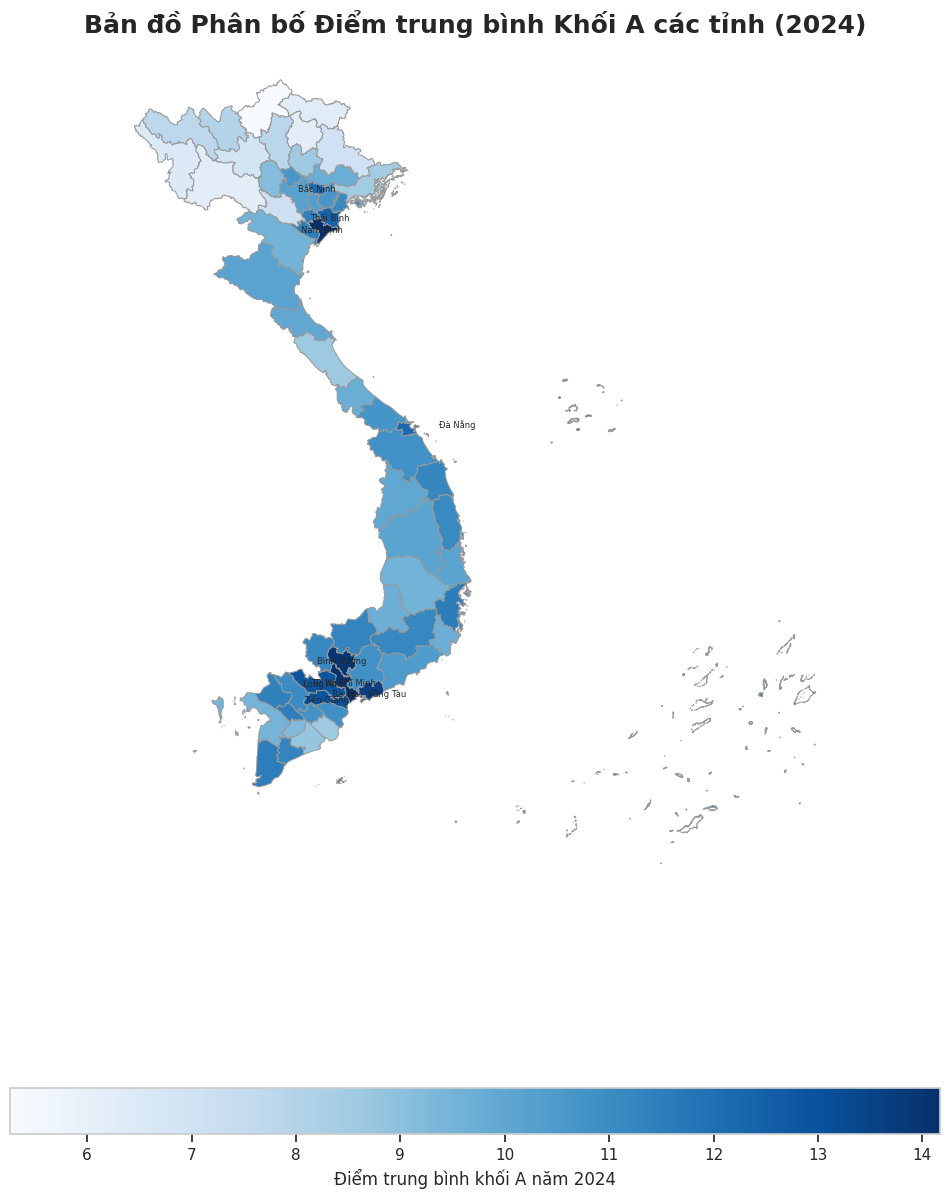

In [24]:
# 3. Vẽ bản đồ Choropleth
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

vn_map_scores.plot(
    column='KhoiA',          # Dữ liệu để tô màu (ví dụ: điểm khối A)
    cmap='Blues',            # Chọn một bảng màu khác, ví dụ: 'Blues'
    linewidth=0.7,
    ax=ax,
    edgecolor='0.6',
    legend=True,
    missing_kwds={          # Định dạng cho các tỉnh không có dữ liệu
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={
        'label': "Điểm trung bình khối A năm 2024",
        'orientation': "horizontal"
    }
)

# Thêm tên tỉnh vào bản đồ
for idx, row in vn_map_scores.iterrows():
    if row['KhoiA'] > 12 and not row['geometry'].is_empty: # vn_map_scores['KhoiA'].median()
        x, y = row['geometry'].centroid.coords[0]
        ax.text(x, y, row['ten_tinh'], fontsize=6, ha='center', va='center')

ax.axis('off')
ax.set_title('Bản đồ Phân bố Điểm trung bình Khối A các tỉnh (2024)',
              fontdict={'fontsize': '18', 'fontweight': 'bold'})

plt.show()

## 3. Khai phá Luật Kết hợp (Association Rule Mining)

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

# Chuẩn bị dữ liệu nhị phân (chọn các môn tự chọn)
optional_subjects = ['Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD']
df_binary = df_total[optional_subjects] > 0

# Tìm tập phổ biến với support tối thiểu là 10%
frequent_itemsets = apriori(df_binary, min_support=0.1, use_colnames=True)

# Sinh luật kết hợp với confidence tối thiểu là 70%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# In ra các luật có lift > 1.2
rules[rules['lift'] > 1.2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Hoa),(Ly),0.325413,0.324218,0.322618,0.991411,3.057849,1.0,0.217113,78.679943,0.997606,0.986558,0.987290,0.993237
1,(Ly),(Hoa),0.324218,0.325413,0.322618,0.995063,3.057849,1.0,0.217113,136.628645,0.995844,0.986558,0.992681,0.993237
2,(Sinh),(Ly),0.321233,0.324218,0.318590,0.991770,3.058957,1.0,0.214440,82.115842,0.991638,0.974691,0.987822,0.987204
3,(Ly),(Sinh),0.324218,0.321233,0.318590,0.982639,3.058957,1.0,0.214440,39.096178,0.996019,0.974691,0.974422,0.987204
4,(Hoa),(Sinh),0.325413,0.321233,0.321173,0.986972,3.072447,1.0,0.216640,52.099799,0.999910,0.986790,0.980806,0.993392
5,(Sinh),(Hoa),0.321233,0.325413,0.321173,0.999813,3.072447,1.0,0.216640,3606.712336,0.993753,0.986790,0.999723,0.993392
6,(Su),(Dia),0.665554,0.663854,0.663500,0.996915,1.501708,1.0,0.221670,108.963500,0.998939,0.996386,0.990823,0.998191
7,(Dia),(Su),0.663854,0.665554,0.663500,0.999467,1.501708,1.0,0.221670,627.763314,0.993889,0.996386,0.998407,0.998191
8,(Su),(GDCD),0.665554,0.553191,0.552951,0.830814,1.501858,1.0,0.184773,2.640937,0.999137,0.830515,0.621347,0.915191
9,(GDCD),(Su),0.553191,0.665554,0.552951,0.999567,1.501858,1.0,0.184773,771.915949,0.747877,0.830515,0.998705,0.915191


## 4. Phân lớp Dữ liệu (Classification)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Tạo target variable
df_model = df_total.copy()
df_model['Dat_Nguong_KhoiA'] = (df_model['KhoiA'] >= 27).astype(int)

# 2. Chọn features và target
features = ['Toan', 'Van', 'NN', 'Ly', 'Hoa', 'Sinh'] # Các môn thi
X = df_model[features]
y = df_model['Dat_Nguong_KhoiA']

# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Huấn luyện mô hình
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# 5. Đánh giá
y_pred = tree_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    920765
           1       0.91      0.72      0.80      2967

    accuracy                           1.00    923732
   macro avg       0.95      0.86      0.90    923732
weighted avg       1.00      1.00      1.00    923732



### Dự đoán xác suất đạt ngưỡng 27 điểm khối A, khi chỉ biết điểm 1 hoặc 2

---

trong 3 môn Toán, Lý, Hóa.

In [29]:
from sklearn.ensemble import RandomForestClassifier

def train_partial_models(df):
    df = df.copy()
    df['Dat_Nguong_KhoiA'] = (df['Toan'] + df['Ly'] + df['Hoa'] >= 27).astype(int)

    rf_params = {
        'random_state': 42,
        'n_estimators': 50,
        'max_depth': 5,
        'n_jobs': -1
    }

    model_tl = RandomForestClassifier(**rf_params)
    model_tl.fit(df[['Toan', 'Ly']], df['Dat_Nguong_KhoiA'])

    model_th = RandomForestClassifier(**rf_params)
    model_th.fit(df[['Toan', 'Hoa']], df['Dat_Nguong_KhoiA'])

    model_lh = RandomForestClassifier(**rf_params)
    model_lh.fit(df[['Ly', 'Hoa']], df['Dat_Nguong_KhoiA'])

    return {
        'Toan_Ly': model_tl,
        'Toan_Hoa': model_th,
        'Ly_Hoa': model_lh
    }

def du_doan_dat_nguong(models, toan=None, ly=None, hoa=None):
    # Dự đoán từ mô hình phù hợp
    if toan is not None and ly is not None:
        model = models['Toan_Ly']
        input_data = [[toan, ly]]
    elif toan is not None and hoa is not None:
        model = models['Toan_Hoa']
        input_data = [[toan, hoa]]
    elif ly is not None and hoa is not None:
        model = models['Ly_Hoa']
        input_data = [[ly, hoa]]
    else:
        raise ValueError("Cần biết ít nhất 2 trong 3 môn: Toán, Lý, Hóa")

    prob = model.predict_proba(input_data)[0][1]
    return prob

#### Sử dụng để dự đoán

In [32]:
# 1. Huấn luyện mô hình từ dữ liệu ban đầu
df_sample = df_total.sample(50000, random_state=42)
models = train_partial_models(df_sample)

# 2. Dự đoán khả năng đạt ngưỡng khi biết điểm Toán, Lý
xac_suat = du_doan_dat_nguong(models, toan=8.0, ly=8.5)
print(f"Xác suất đạt ngưỡng 27: {xac_suat:.2%}")

Xác suất đạt ngưỡng 27: 0.12%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


==> Random Forest chỉ học từ mẫu quá khứ và chia nhỏ không gian đặc trưng (Toán, Lý) → nó không "hiểu toán học" rằng điểm Hóa tối đa là 10.

## 5. Phân cụm Dữ liệu (Clustering)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Tính điểm trung bình các môn theo tỉnh
province_features = df_total.groupby('MaTinh')[score_cols].mean().copy()

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(province_features)

# 3. KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
province_features['Cluster'] = kmeans.fit_predict(scaled_features)

# 4. In thông tin trung bình điểm theo cụm
cluster_summary = province_features.groupby('Cluster')[score_cols].mean()
print(cluster_summary)

             Toan       Van        NN        Ly       Hoa      Sinh        Su  \
Cluster                                                                         
0        6.723527  6.749794  5.054823  3.121672  3.184776  2.788649  3.310736   
1        6.116354  6.407225  4.519765  2.165437  2.230010  1.950874  4.040123   
2        5.319237  6.329562  3.890692  0.933062  0.960966  0.834853  5.260065   
3        6.445726  7.408469  4.584166  1.979537  1.963194  1.686533  4.658093   

              Dia      GDCD  
Cluster                      
0        3.513115  3.437914  
1        4.288271  4.603937  
2        5.564264  5.687888  
3        4.893127  4.814208  


In [39]:
province_features

,Toan,Van,NN,Ly,Hoa,Sinh,Su,Dia,GDCD,Cluster
MaTinh,,,,,,,,,,
01,6.612670,7.126108,5.072627,1.812229,1.666678,1.454452,4.551338,4.701038,4.751738,3
02,6.917794,6.387268,5.629743,3.547600,3.690860,3.270125,2.745810,2.854588,2.865670,0
03,6.736908,7.638092,5.174996,2.243744,2.161121,1.916757,4.452535,4.702362,4.855238,3
04,6.529886,6.023273,5.147339,2.791006,2.742344,2.283287,3.253138,3.492907,3.655948,0
05,4.385904,5.502884,3.382810,0.476349,0.488882,0.415190,5.062339,5.509584,5.828727,2
...,...,...,...,...,...,...,...,...,...,...
60,6.350446,7.017464,4.610574,2.388902,2.476068,2.288871,4.130194,4.305256,4.541621,1
61,6.023397,6.486421,4.535765,2.696169,2.771269,2.657721,3.442168,3.644624,4.283909,1
62,4.914010,6.487004,3.534666,0.750701,0.817183,0.666302,5.378027,5.701868,5.718052,2


## Bài 5: Phân tích Xu hướng và Biến động theo Thời gian (Trend and Fluctuation Analysis)

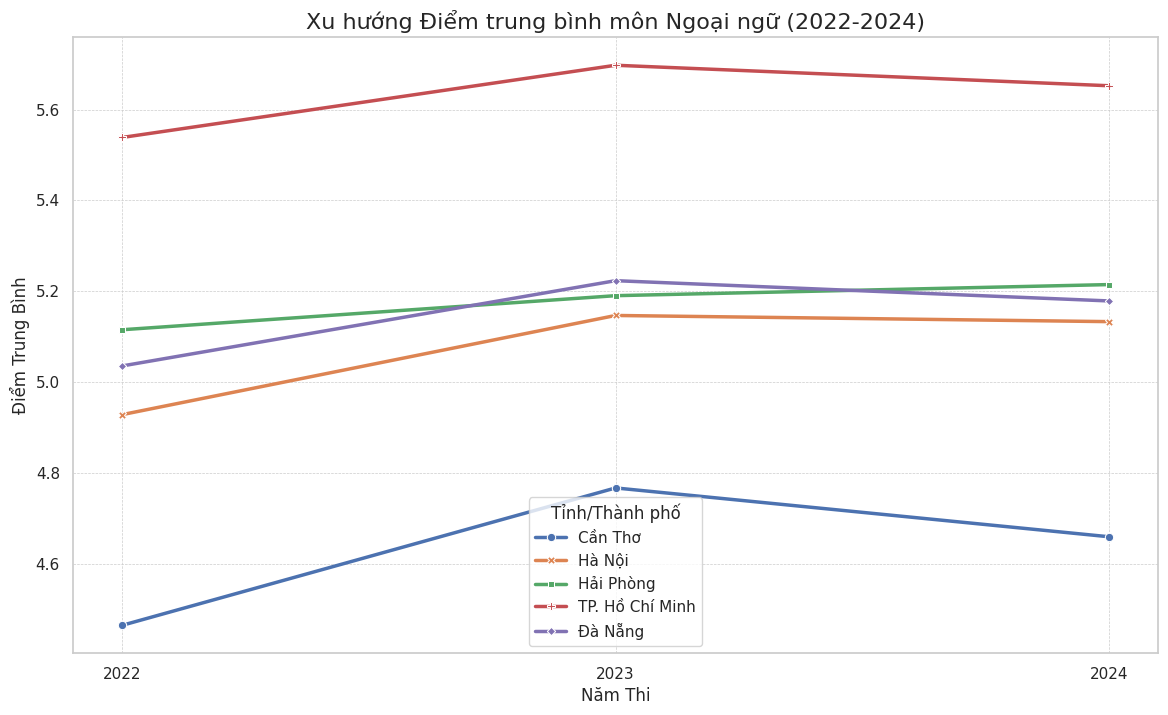

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_total và TenTinh đã có sẵn

# 1. Tính điểm trung bình môn 'NN' (Ngoại ngữ) của mỗi tỉnh qua các năm
province_trends = df_total.groupby(['NamThi', 'TenTinh'])['NN'].mean().reset_index()

# 2. Lấy danh sách các tỉnh tiêu biểu (ví dụ: 5 thành phố trực thuộc trung ương)
# Hoặc có thể lấy top 5 tỉnh có điểm cao nhất năm 2022
major_cities = ['Hà Nội', 'TP. Hồ Chí Minh', 'Hải Phòng', 'Đà Nẵng', 'Cần Thơ']
df_plot = province_trends[province_trends['TenTinh'].isin(major_cities)]

# 3. Vẽ biểu đồ đường
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_plot,
    x='NamThi',
    y='NN',
    hue='TenTinh', # Mỗi tỉnh một màu
    style='TenTinh', # Mỗi tỉnh một kiểu đường
    markers=True,
    dashes=False,
    linewidth=2.5
)

plt.title('Xu hướng Điểm trung bình môn Ngoại ngữ (2022-2024)', fontsize=16)
plt.ylabel('Điểm Trung Bình', fontsize=12)
plt.xlabel('Năm Thi', fontsize=12)
plt.xticks([2022, 2023, 2024])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Tỉnh/Thành phố')
plt.show()

## Bài 6: Phân tích Tăng trưởng và so sánh giữa các Năm

--- Các tỉnh có mức tăng trưởng điểm khối A cao nhất (2022-2024) ---
              TenTinh  KhoiA_2022  KhoiA_2023  KhoiA_2024  Growth_A_24_vs_22
2          Bình Dương   13.305431   13.483493   14.010178           0.704747
52        Tuyên Quang    7.445864    7.208288    7.821928           0.376064
1   Bà Rịa - Vũng Tàu   13.264991   12.949865   13.638567           0.373577
13            Cần Thơ   11.204576   10.929890   11.518129           0.313554
41         Quảng Ninh    8.176795    7.977445    8.482875           0.306080


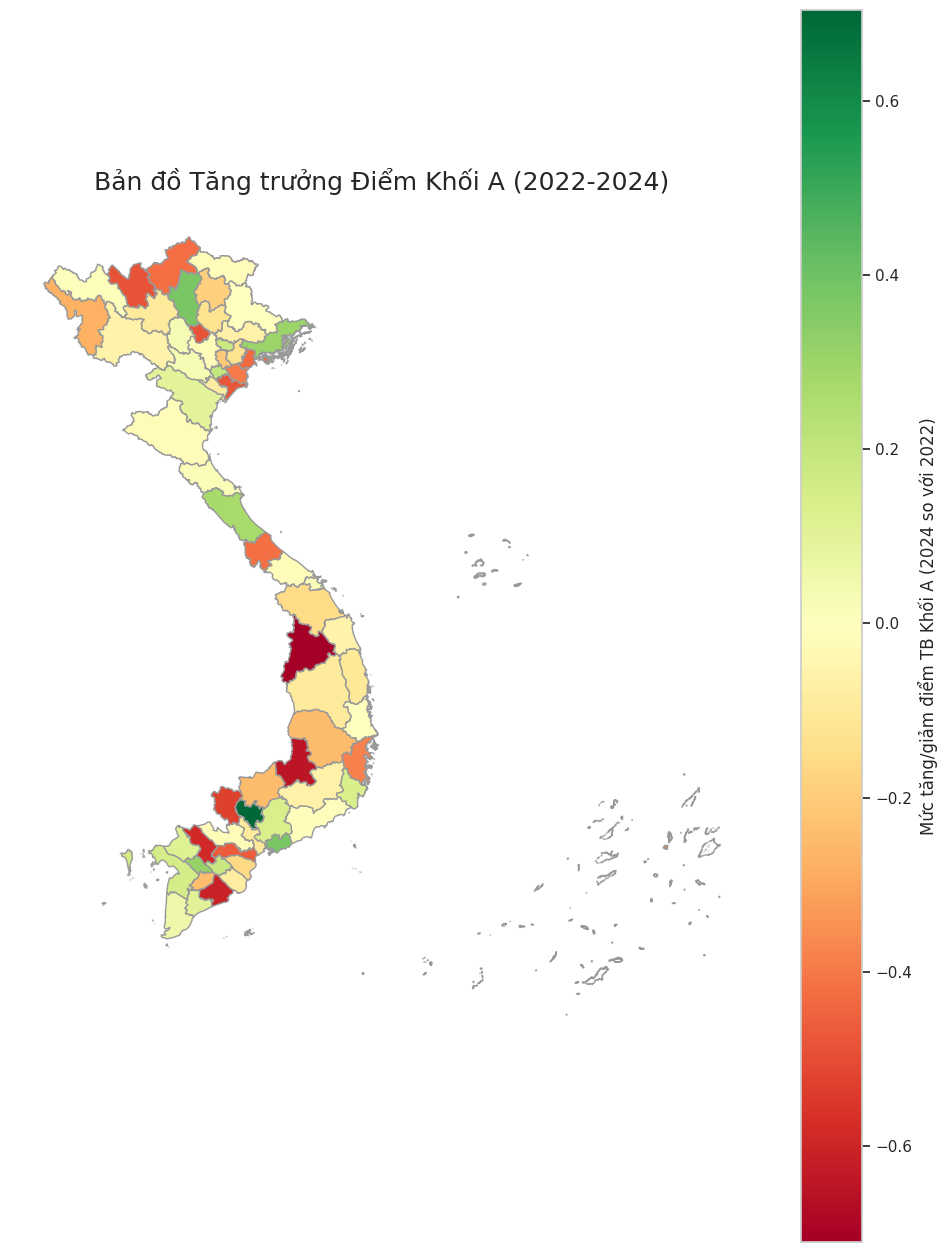

In [43]:
# 1. Chuẩn bị dữ liệu (pivot_table là công cụ rất mạnh cho việc này)
growth_df = df_total.pivot_table(
    index='TenTinh',
    columns='NamThi',
    values='KhoiA' # Phân tích tăng trưởng cho khối A
).reset_index()

# Đổi tên cột cho dễ xử lý
growth_df.columns = ['TenTinh', 'KhoiA_2022', 'KhoiA_2023', 'KhoiA_2024']

# 2. Tính toán mức tăng trưởng từ năm đầu đến năm cuối
growth_df['Growth_A_24_vs_22'] = growth_df['KhoiA_2024'] - growth_df['KhoiA_2022']

print("--- Các tỉnh có mức tăng trưởng điểm khối A cao nhất (2022-2024) ---")
print(growth_df.sort_values(by='Growth_A_24_vs_22', ascending=False).head())

# 3. Kết hợp với dữ liệu bản đồ và vẽ
# (Giả sử vn_map đã được load)
vn_map_growth = vn_map.merge(growth_df, left_on='ten_tinh', right_on='TenTinh', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 16))
vn_map_growth.plot(
    column='Growth_A_24_vs_22',
    cmap='RdYlGn', # Red-Yellow-Green: Đỏ (giảm), Vàng (ít thay đổi), Xanh (tăng)
    ax=ax,
    edgecolor='0.6',
    legend=True,
    legend_kwds={'label': "Mức tăng/giảm điểm TB Khối A (2024 so với 2022)"}
)
ax.set_title('Bản đồ Tăng trưởng Điểm Khối A (2022-2024)', fontsize=18)
ax.axis('off')
plt.show()

## Bài 7: Mô hình Dự báo Xu hướng (Trend Forecasting Models)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



--- Dự báo điểm Toán trung bình của Hà Nội năm 2025 ---
Điểm dự báo: 6.59


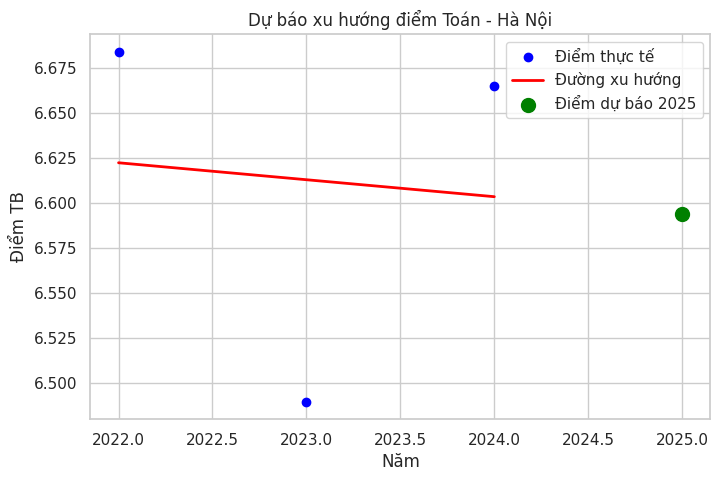

In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Lấy dữ liệu của 'Hà Nội' cho môn 'Toan'
hanoi_math_trend = df_total[
    (df_total['TenTinh'] == 'Hà Nội')
].groupby('NamThi')['Toan'].mean().reset_index()

# 2. Chuẩn bị dữ liệu
X = hanoi_math_trend[['NamThi']] # Phải là DataFrame 2D
y = hanoi_math_trend['Toan']

# 3. Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# 4. Dự báo cho năm 2025
year_2025 = np.array([[2025]])
predicted_score_2025 = model.predict(year_2025)

print(f"\n--- Dự báo điểm Toán trung bình của Hà Nội năm 2025 ---")
print(f"Điểm dự báo: {predicted_score_2025[0]:.2f}")

# Trực quan hóa đường hồi quy
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Điểm thực tế')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Đường xu hướng')
plt.scatter(year_2025, predicted_score_2025, color='green', s=100, label='Điểm dự báo 2025', zorder=5)
plt.title('Dự báo xu hướng điểm Toán - Hà Nội')
plt.xlabel('Năm')
plt.ylabel('Điểm TB')
plt.legend()
plt.grid(True)
plt.show()